<img src="https://compjunior.com.br/img/LOGO.37469763.png">

# Bem-vindos ao Processo Seletivo da Comp Júnior!

Parabéns por ter chegado até esta etapa do processo seletivo para treinees da Comp Júnior, a empresa júnior da Universidade Federal de Lavras (UFLA). Nesta avaliação, você será desafiado a demonstrar suas habilidades de análise de dados utilizando Python, juntamente com as bibliotecas Numpy, Pandas e Matplotlib.

## Contexto do Problema

Você foi contratado como analista de dados pela Comp Júnior e sua primeira tarefa é analisar um conjunto de dados de vendas da nossa recém-adquirida loja online. O objetivo é extrair insights que ajudarão a empresa a entender melhor o comportamento de compra dos clientes, avaliar o desempenho das vendas e otimizar as operações logísticas.

### Dados Disponíveis

Os dados incluem informações sobre clientes, pedidos e produtos. Seu desafio é processar, analisar e visualizar esses dados para responder às questões propostas abaixo.

<a href="https://drive.google.com/file/d/1cgKWKH1pH_6sAlYjEPkcR_KM1XRrSubh/view?usp=sharing" target="_blank">Clique aqui para baixar as três tabelas.</a>

Lembre-se de colocar os dados no mesmo diretório do arquivo e <strong>boa sorte e que você possa demonstrar todo o seu potencial</strong>!

# Exercícios

## Bibliotecas
Utilize a célula abaixo para importar TODAS as bibliotecas necessárias.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Exercício 01
Na sua primeira tarefa como analista de dados na Comp Júnior, você precisa combinar informações de diferentes fontes para uma visão holística. Carregue os datasets de clientes, pedidos e produtos usando o Pandas e crie um único DataFrame unificando esses dados por suas chaves relevantes (customer_id, order_id).

Apresente as primeiras cinco linhas do DataFrame resultante para verificação e atribua os seguintes nomes às respectivas tabelas:

- **olist_customers_dataset**: customer_df
- **olist_orders_dataset**: orders_df
- **olist_order_items_dataset**: items_df
- **Tabela única**: df

---

## **Criando dfs**

In [2]:
customer_df = pd.read_csv("olist_customers_dataset.csv")
orders_df = pd.read_csv("olist_orders_dataset.csv")
items_df = pd.read_csv("olist_order_items_dataset.csv")
reviews_df = pd.read_csv("olist_order_reviews_dataset.csv")

## **Operando merge nos dfs e colocando-os em um só**

In [3]:
# fiz uma função por que vou usar ali embaixo novamente e queria economizar umas linhas
def merge_dfs(customer_df, orders_df):
  df = orders_df.merge(customer_df, on='customer_id', how='inner')
  df = df.merge(items_df, on='order_id', how='inner')
  # Unir as tabelas de pedidos e reviews com base em 'order_id'
  df = df.merge(reviews_df, on='order_id', how='inner')
  return df

df = merge_dfs(customer_df, orders_df)

## **Exibindo df final**

In [4]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51




---



## Exercício 02
Dados precisos são cruciais para uma análise eficaz. Identifique e trate valores ausentes ou duplicados nos datasets de clientes e pedidos. Explique sua abordagem e justifique as decisões tomadas para o tratamento desses dados.

---

## **Identificando**

In [5]:
print("Valores clientes ausentes:\n\n", customer_df.isna().sum())

Valores clientes ausentes:

 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [6]:
print("Duplicados:\n\n", customer_df.duplicated().sum())

Duplicados:

 0


In [7]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
print("Valores clientes ausentes:\n\n", orders_df.isna().sum())

Valores clientes ausentes:

 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [9]:
print("Duplicados:\n\n", orders_df.duplicated().sum())

Duplicados:

 0


## **Justificativa para exclusão das linhas com valores nulos**

Ao olharmos para estes resultados, temos que considerar o valor da informação e nos fazermos as seguintes perguntas: "essa informação é realmente necessária para nossa análise?", "a quantidade é relevante caso apagarmos?", "se substirtuirmos por um certo valor, como a média dos valores, teremos perda da precisão da nossa informação?".

Visto isso, optarei por apagar as linhas que contém nulo, visto que representa apenas, aproximadamente, 4,92% dos nossos dados(3487 de 70871), teremos unicamente dados puros onde não precisaremos nos preocupar com os valores nulos durante a análise.

Obs: usar a média dos valores nesses locais onde possui nulo, aumentaria consideravelmente a chance de termos amostras com os mesmos dados dessas colunas, prejudicando nossa análise.

Caso após as análises, virmos que é necessário mais dados, podemos optar em resgatar os dados e operar com eles novamente. Assim como meu professor de Inteligência Artificial, Ahmed, afirmou, a Ciência de Dados é uma área onde é preciso muitos testes. Faça e erre, faça novamente, porém com uma abordagem diferente, até que se acerte ou chegue em uma solução satisfatória.

## **Removendo linhas com valores nulos**

In [10]:
orders_df = orders_df.dropna()

In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


## **Fazendo novo df principal**

In [12]:
df = merge_dfs(customer_df, orders_df)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51




---



## Exercício 03
Como parte do seu relatório mensal, você precisa fornecer um resumo estatístico dos preços dos produtos. Utilize o método describe() do Pandas para detalhar a distribuição dos preços, destacando possíveis outliers e sua possível influência no cálculo da média.



---



In [13]:
df['price'].describe()

count    109996.000000
mean        119.694168
std         180.760973
min           0.850000
25%          39.900000
50%          74.900000
75%         133.900000
max        6735.000000
Name: price, dtype: float64

## **Análise acerca dos dados referente aos preços**

Analisando os quartis, vemos que:

In [14]:
# min       25%      50%         75%        max
# 0.85 <--> 39.9 <--> 74.9 <--> 134.17 <--> 6735.0

# fui além e busquei saber como saber possíveis outliers, aplicando alguns calculos é possível determinar:
# primeiro calculamos a IQR(intervalo interquartil) e após isso aplicamos as formulas: Q1−1.5×IQR e Q3+1.5×IQR
# visto isso, fiz a função abaixo

In [15]:
def get_definers_outliers(Pq, Tq):
  IQR = Tq - Pq
  lower_bound = Pq - 1.5 * IQR
  upper_bound = Tq + 1.5 * IQR

  return lower_bound, upper_bound

In [16]:
definers_outliers = get_definers_outliers(df['price'].describe()['25%'], df['price'].describe()['75%'])
definers_outliers # Como preços não podem ser negativos, podemos considerar 0 como limite inferior prático.

(-101.1, 274.9)

Assim, valores acima de 275.575 são considerados outliers. O máximo valor de 6735.00 é um outlier significativo, indicando que há alguns preços extremamente altos que podem estar influenciando a média por "puxar" ela rumo a esses valores. Dessa forma, usar a mediana como medida central e poder ter melhores afirmações, como em casos de ser necessário saber o ticket médio, é uma boa!

Analisando visualmente por meio de boxplot temos um visual interessante disso.

<Axes: ylabel='price'>

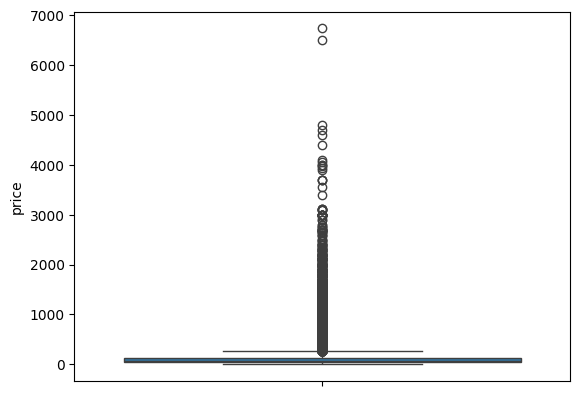

In [17]:
sns.boxplot(df['price'])



---



## Exercício 04
A eficiência logística é vital para a satisfação do cliente. Adicione uma coluna ao DataFrame de pedidos que calcule o número de dias entre a data de compra e a data de entrega. Discuta como variações nesse prazo podem impactar a percepção do cliente.

In [18]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

In [19]:
# order_delivered_customer_date - order_purchase_timestamp
orders_df['days_until_reaching_the_customer'] = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']

In [20]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_until_reaching_the_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13 days 05:00:36
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2 days 20:58:23


In [21]:
df = merge_dfs(customer_df, orders_df)

É essencial que a entrega seja agil para que o cliente continue comprando. Dessa forma, ao analisarmos os dados da coluna que acabamos de criar podemos notar se os clientes que receberam suas entregas mais rapidamente compraram novamente ou algo do tipo.

## Exercício 05
Visualizações claras podem revelar tendências que antes não eram possíveis de serem capturadas. Crie um gráfico de barras vertical que mostre o volume de vendas mensal por estado. Use essa visualização para identificar quais estados apresentaram maior crescimento no último ano.

In [22]:
df_aux = df

df_aux['order_purchase_timestamp'] = pd.to_datetime(df_aux['order_purchase_timestamp'])

df_aux['year'] = df_aux['order_purchase_timestamp'].dt.year
df_aux['month'] = df_aux['order_purchase_timestamp'].dt.month

In [23]:
monthly_sales_by_state = df_aux.groupby(['customer_state', 'year', 'month'])['order_id'].count().reset_index()
monthly_sales_by_state.rename(columns={'order_id': 'monthly_sales'}, inplace=True)

In [24]:
current_year = df_aux['year'].max()
monthly_sales_by_state = monthly_sales_by_state[monthly_sales_by_state['year'] == current_year]

In [25]:
total_sales_by_state = monthly_sales_by_state.groupby('customer_state')['monthly_sales'].sum().reset_index()
total_sales_by_state.rename(columns={'monthly_sales': 'total_sales'}, inplace=True)

In [26]:
def get_total_sales_by_state(df_aux, current_year):
  monthly_sales_by_state = df_aux.groupby(['customer_state', 'year', 'month'])['order_id'].count().reset_index()
  monthly_sales_by_state.rename(columns={'order_id': 'monthly_sales'}, inplace=True)

  monthly_sales_by_state = monthly_sales_by_state[monthly_sales_by_state['year'] == current_year]

  total_sales_by_state = monthly_sales_by_state.groupby('customer_state')['monthly_sales'].sum().reset_index()
  total_sales_by_state.rename(columns={'monthly_sales': 'total_sales'}, inplace=True)

  return total_sales_by_state

current_year = df_aux['year'].max()
total_sales_by_state = get_total_sales_by_state(df_aux, current_year)

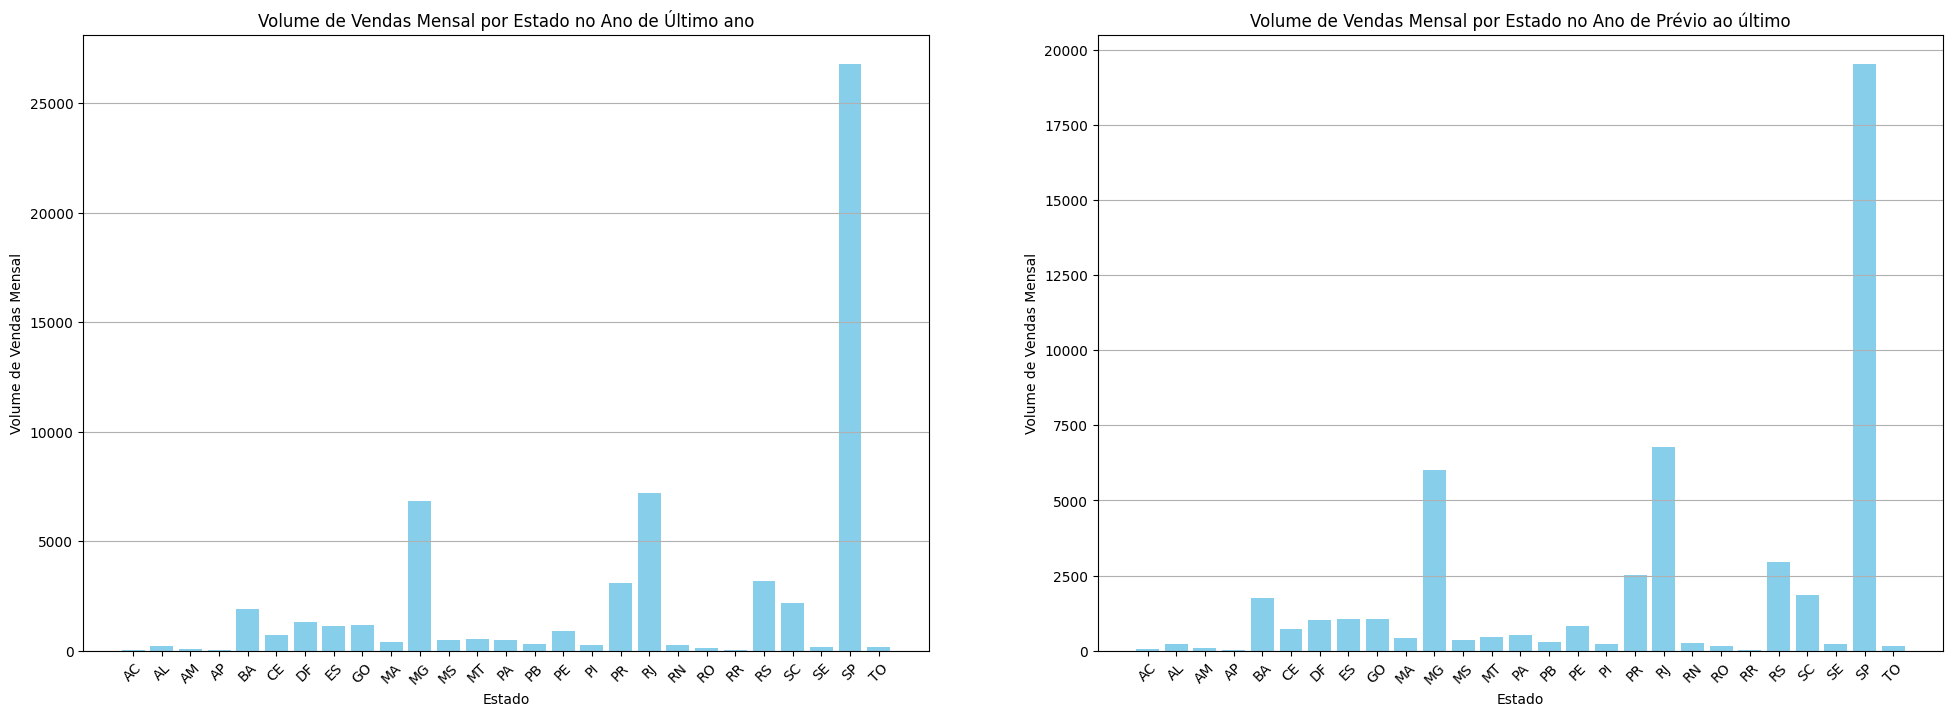

In [27]:
plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.bar(total_sales_by_state['customer_state'], total_sales_by_state['total_sales'], color='skyblue')
plt.title('Volume de Vendas Mensal por Estado no Ano de Último ano'.format(current_year))
plt.xlabel('Estado')
plt.ylabel('Volume de Vendas Mensal')
plt.xticks(rotation=45)
plt.grid(axis='y')

total_sales_by_state = get_total_sales_by_state(df_aux, current_year-1)

plt.subplot(1, 2, 2)
plt.bar(total_sales_by_state['customer_state'], total_sales_by_state['total_sales'], color='skyblue')
plt.title('Volume de Vendas Mensal por Estado no Ano de Prévio ao último')
plt.xlabel('Estado')
plt.ylabel('Volume de Vendas Mensal')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Nota-se claramente o crescimento de São Paulo

## Exercício 06
Para incentivar uma competição saudável entre os vendedores, você decide analisar o desempenho individual. Calcule e visualize o total de vendas por vendedor usando um gráfico de barras horizontal no Matplotlib, destacando o vendedor com maior volume de vendas.

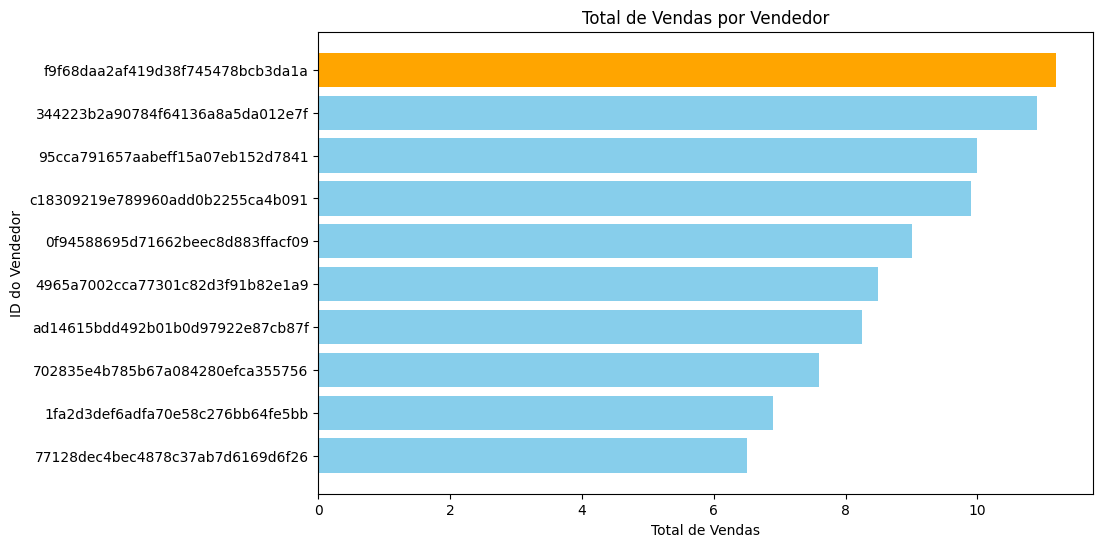

In [28]:
total_sales_per_seller = df.groupby('seller_id')['price'].sum().reset_index()
total_sales_per_seller = total_sales_per_seller.sort_values(by='price', ascending=True)

total_sales_per_seller = total_sales_per_seller.head(10)

top_seller_id = total_sales_per_seller.iloc[-1]['seller_id']
top_seller_sales = total_sales_per_seller.iloc[-1]['price']

plt.figure(figsize=(10, 6))
bars = plt.barh(total_sales_per_seller['seller_id'], total_sales_per_seller['price'], color='skyblue')
plt.barh(top_seller_id, top_seller_sales, color='orange')  # Destacar o top vendedor
plt.xlabel('Total de Vendas')
plt.ylabel('ID do Vendedor')
plt.title('Total de Vendas por Vendedor')
plt.show()

## Exercício 07
Entender a dinâmica de preços é crucial para estratégias de marketing. Utilize Numpy para calcular a média, mediana e desvio padrão dos preços dos produtos, discutindo como essas métricas podem ajudar na definição de estratégias de precificação.

In [29]:
mean_price = np.mean(df['price'])
median_price = np.median(df['price'])
std_dev_price = np.std(df['price'])

# Exibir as métricas
print(f"Média dos preços: {mean_price:.2f}")
print(f"Mediana dos preços: {median_price:.2f}")
print(f"Desvio padrão dos preços: {std_dev_price:.2f}")

# Discussão sobre as métricas
print("\nDiscussão sobre as métricas:")
print("1. Média: A média dos preços fornece uma visão geral do preço típico dos produtos no mercado.")
print("   Estratégia: Pode ser usada para definir um preço competitivo que esteja alinhado com o mercado.")
print("2. Mediana: A mediana é útil para entender a tendência central dos preços, especialmente se houver valores extremos (outliers).")
print("   Estratégia: Pode ser usada para definir preços que atendam a maioria dos clientes, evitando distorções causadas por outliers.")
print("3. Desvio padrão: O desvio padrão mostra a variabilidade dos preços.")
print("   Estratégia: Um desvio padrão alto pode indicar a necessidade de segmentar o mercado e oferecer diferentes faixas de preço para diferentes segmentos de clientes.")

Média dos preços: 119.69
Mediana dos preços: 74.90
Desvio padrão dos preços: 180.76

Discussão sobre as métricas:
1. Média: A média dos preços fornece uma visão geral do preço típico dos produtos no mercado.
   Estratégia: Pode ser usada para definir um preço competitivo que esteja alinhado com o mercado.
2. Mediana: A mediana é útil para entender a tendência central dos preços, especialmente se houver valores extremos (outliers).
   Estratégia: Pode ser usada para definir preços que atendam a maioria dos clientes, evitando distorções causadas por outliers.
3. Desvio padrão: O desvio padrão mostra a variabilidade dos preços.
   Estratégia: Um desvio padrão alto pode indicar a necessidade de segmentar o mercado e oferecer diferentes faixas de preço para diferentes segmentos de clientes.


## Exercício 08
A precisão nas previsões de entrega é um indicador chave de desempenho logístico. Desenvolva um método para comparar as datas estimadas e reais de entrega, identificando padrões de atrasos ou adiantamentos nas entregas. Faça um gráfico de linhas com o tempo médio de atraso por semana ao longo do tempo. O eixo y deve ser o tempo médio de atraso (em dias) e o eixo x as semanas do ano.

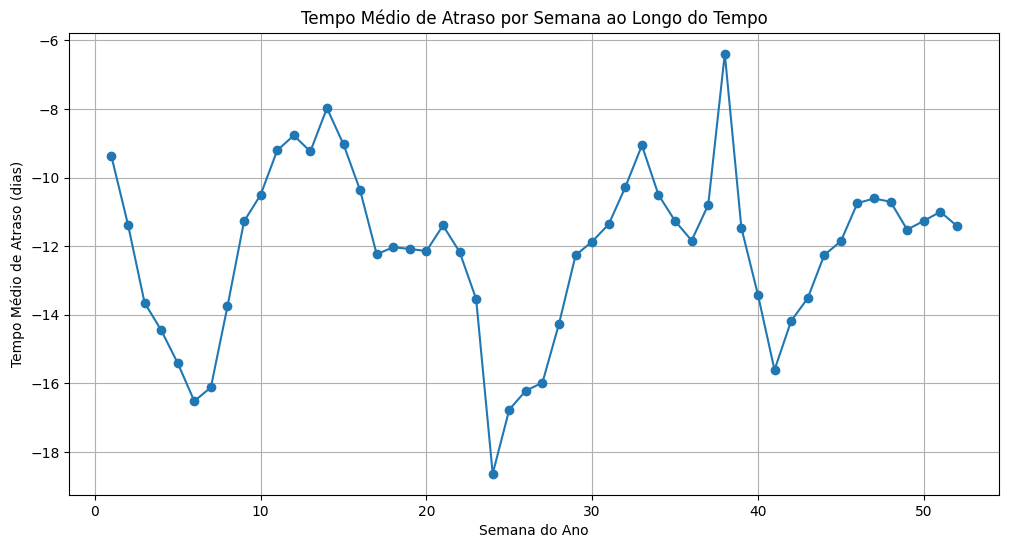

In [30]:
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

# Calcular o tempo de atraso (em dias)
df['delivery_delay'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

df['delivery_week'] = df['order_delivered_customer_date'].dt.isocalendar().week

average_delay_per_week = df.groupby('delivery_week')['delivery_delay'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(average_delay_per_week['delivery_week'], average_delay_per_week['delivery_delay'], marker='o', linestyle='-')
plt.xlabel('Semana do Ano')
plt.ylabel('Tempo Médio de Atraso (dias)')
plt.title('Tempo Médio de Atraso por Semana ao Longo do Tempo')
plt.grid(True)
plt.show()

## Exercício 09
Investigue a relação entre o valor do frete e o preço dos produtos. Calcule a correlação entre esses dois fatores e crie um scatter plot para visualizar essa relação, discutindo como isso pode afetar as decisões de frete grátis.

Correlação entre preço dos produtos e valor do frete: 0.41


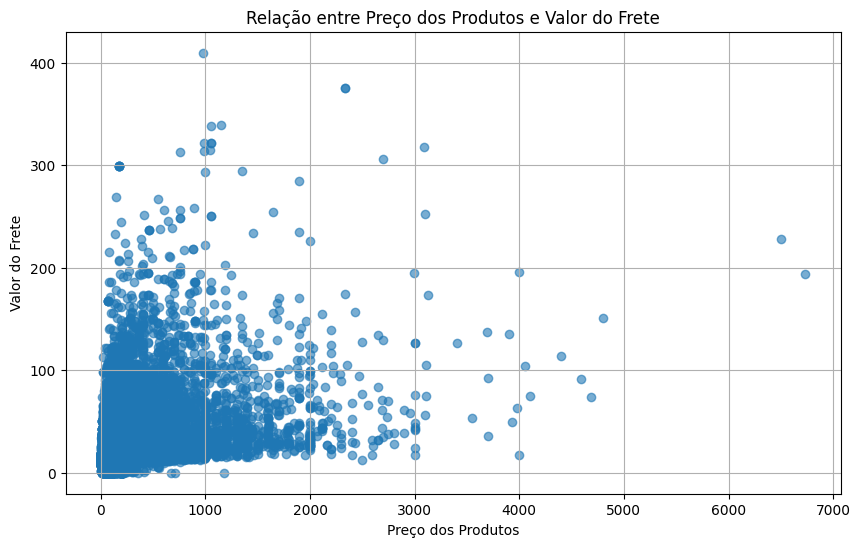

In [31]:
correlation = df['price'].corr(df['freight_value'])

# Exibir a correlação
print(f"Correlação entre preço dos produtos e valor do frete: {correlation:.2f}")

# Criar scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['freight_value'], alpha=0.6)
plt.xlabel('Preço dos Produtos')
plt.ylabel('Valor do Frete')
plt.title('Relação entre Preço dos Produtos e Valor do Frete')
plt.grid(True)
plt.show()

## Exercício 10
Análises de feedback de clientes são essenciais para melhorias. Agrupe os dados de pedidos por avaliação média e calcule o volume de vendas para cada grupo, usando um gráfico de linha para mostrar a tendência de vendas em relação às avaliações.

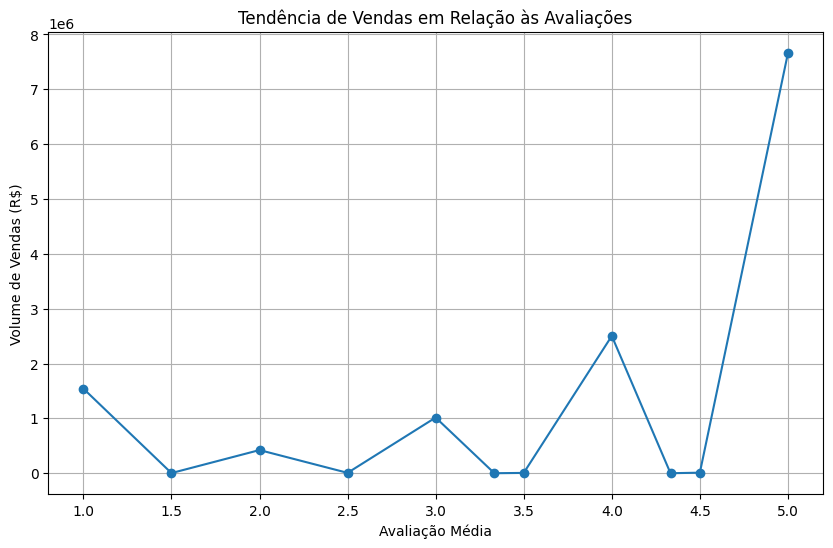

    Review Score  Total Sales
0       1.000000   1542536.39
1       1.500000      2658.16
2       2.000000    422225.82
3       2.500000      6707.24
4       3.000000   1015243.14
5       3.333333        78.00
6       3.500000      5875.74
7       4.000000   2503123.54
8       4.333333       104.97
9       4.500000     10146.50
10      5.000000   7657180.18


In [32]:
average_review_scores = df.groupby('order_id')['review_score'].mean().reset_index()

orders_with_reviews_df = df.merge(average_review_scores, on='order_id', how='inner')

sales_by_review_score = orders_with_reviews_df.groupby('review_score_y')['price'].sum().reset_index()

# Renomear colunas para clareza
sales_by_review_score.columns = ['Review Score', 'Total Sales']

# Criar gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(sales_by_review_score['Review Score'], sales_by_review_score['Total Sales'], marker='o', linestyle='-')
plt.xlabel('Avaliação Média')
plt.ylabel('Volume de Vendas (R$)')
plt.title('Tendência de Vendas em Relação às Avaliações')
plt.grid(True)
plt.show()

# Exibir dados de vendas por avaliação
print(sales_by_review_score)

## Exercício 11
Com o fim do mês se aproximando, você precisa preparar e exportar os dados analisados para um relatório em formato CSV. Exporte o DataFrame final que inclui todos os dados e cálculos realizados, garantindo que esteja pronto para uso em outros softwares de análise.

In [33]:
csv_file_path = 'relatorio_final.csv'
df.to_csv(csv_file_path, index=False)